In [2]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "city_data.csv"
ride_data_to_load = "ride_data.csv"

# Read the City and Ride Data
city_df = pd.read_csv(city_data_to_load)
ride_df = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
pyber_df = pd.merge(ride_df, city_df, on='city')
# Display the data table for preview
pyber_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,Lake Jonathanshire,2018-04-07 20:51:11,31.25,4441251834598,5,Urban
2,Lake Jonathanshire,2018-03-09 23:45:55,19.89,2389495660448,5,Urban
3,Lake Jonathanshire,2018-04-07 18:09:21,24.28,7796805191168,5,Urban
4,Lake Jonathanshire,2018-01-02 14:14:50,13.89,424254840012,5,Urban


In [3]:
urban_data = pyber_df.loc[pyber_df['type'] == 'Urban'].groupby('city')
suburban_data = pyber_df.loc[pyber_df['type'] == 'Suburban'].groupby('city')
rural_data = pyber_df.loc[pyber_df['type'] == 'Rural'].groupby('city')

In [4]:
urban_data.count().head()

,date,fare,ride_id,driver_count,type
city,,,,,
Amandaburgh,18,18,18,18,18
Barajasview,22,22,22,22,22
Carriemouth,27,27,27,27,27
Christopherfurt,27,27,27,27,27
Deanville,19,19,19,19,19


## Bubble Plot of Ride Sharing Data

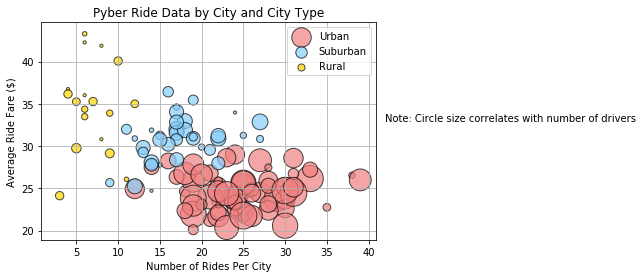

In [10]:
# Obtain the x and y coordinates for each of the three city types
urban_x = urban_data.count()['ride_id']
urban_y = urban_data.mean()['fare']
suburb_x = suburban_data.count()['ride_id']
suburb_y = suburban_data.mean()['fare']
rural_x = rural_data.count()['ride_id']
rural_y = rural_data.mean()['fare']

# Build the scatter plots for each city types
plt.scatter(urban_x, urban_y, marker = 'o', facecolors = 'lightcoral', edgecolors = 'black', 
            s=urban_data.mean()['driver_count']*10, alpha=.7, label = 'Urban')
plt.scatter(suburb_x, suburb_y, marker = 'o', facecolors = 'lightskyblue', edgecolors = 'black', 
            s=suburban_data.mean()['driver_count']*10,alpha=.7, label = 'Suburban')
plt.scatter(rural_x, rural_y, marker = 'o', facecolors = 'gold', edgecolors = 'black', 
            s=rural_data.mean()['driver_count']*10, alpha=.7, label = 'Rural')

# Incorporate the other graph properties
plt.grid()
plt.xlabel('Number of Rides Per City')
plt.ylabel('Average Ride Fare ($)')
plt.title('Pyber Ride Data by City and City Type')

# Create a legend
plt.legend(loc='upper right')

# Incorporate a text label regarding circle size
plt.text(42, 33, 'Note: Circle size correlates with number of drivers')

# Save Figure
plt.savefig("pyber_data_plot.png")

plt.show()

## Total Fares by City Type

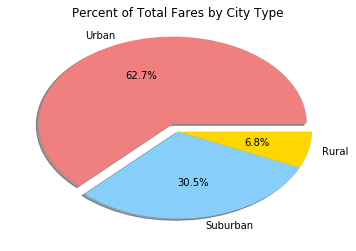

In [11]:
# Calculate Type Percents
total_fares = pyber_df.sum()['fare']
urban_fares = pyber_df.groupby('type').sum().loc['Urban','fare']
suburban_fares = pyber_df.groupby('type').sum().loc['Suburban','fare']
rural_fares = pyber_df.groupby('type').sum().loc['Rural','fare']
urban_pct = urban_fares/total_fares
suburban_pct = suburban_fares/total_fares
rural_pct = rural_fares/total_fares
sizes = [urban_pct, suburban_pct, rural_pct]
labels = ['Urban', 'Suburban', 'Rural']
colors = ['lightcoral', 'lightskyblue', 'gold']

# Build Pie Chart
plt.pie(sizes, explode = [.1,0,0], labels = labels, colors = colors, autopct = '%1.1f%%', shadow=True)
plt.title("Percent of Total Fares by City Type")

# Save Figure
plt.savefig('pyber_fares_chart.png')

plt.show()


## Total Rides by City Type

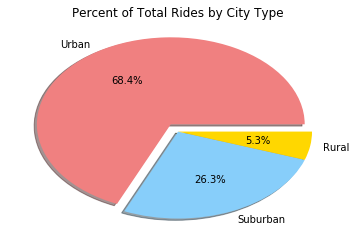

In [12]:
# Calculate Ride Percents
total_rides = len(pyber_df)
urban_rides = pyber_df.groupby('type').count().loc['Urban','ride_id']
suburban_rides = pyber_df.groupby('type').count().loc['Suburban','ride_id']
rural_rides = pyber_df.groupby('type').count().loc['Rural','ride_id']
urban_pct = urban_rides/total_rides
suburban_pct = suburban_rides/total_rides
rural_pct = rural_rides/total_rides
sizes = [urban_pct, suburban_pct, rural_pct]
labels = ['Urban', 'Suburban', 'Rural']
colors = ['lightcoral', 'lightskyblue', 'gold']


# Build Pie Chart
plt.pie(sizes, explode = [.1,0,0], labels = labels, colors = colors, autopct = '%1.1f%%', shadow=True)
plt.title("Percent of Total Rides by City Type")

# Save Figure
plt.savefig('pyber_rides_chart.png')

plt.show()


## Total Drivers by City Type

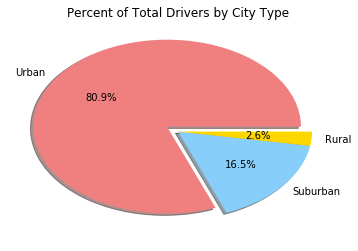

In [13]:
# Calculate Driver Percents
total_drivers = city_df.sum()['driver_count']
urban_drivers = city_df.loc[city_df['type'] == 'Urban'].sum()['driver_count']
suburban_drivers = city_df.loc[city_df['type'] == 'Suburban'].sum()['driver_count']
rural_drivers = city_df.loc[city_df['type'] == 'Rural'].sum()['driver_count']
urban_pct = urban_drivers/total_drivers
suburban_pct = suburban_drivers/total_drivers
rural_pct = rural_drivers/total_drivers
sizes = [urban_pct, suburban_pct, rural_pct]
labels = ['Urban', 'Suburban', 'Rural']
colors = ['lightcoral', 'lightskyblue', 'gold']


# Build Pie Chart
plt.pie(sizes, explode = [.1,0,0], labels = labels, colors = colors, autopct = '%1.1f%%', shadow=True)
plt.title("Percent of Total Drivers by City Type")

# Save Figure
plt.savefig('pyber_drivers_chart.png')

plt.show()


Observed Trends:

1. Urban cities have the vast majority of fares, rides, and drivers.

2. Although rural cities have the fewest drivers, their rides tend to have greater fares. This makes sense as rural cities are spread out, whereas urban cities are more compact.

3. Even in some urban and suburban cities with comparable numbers of rides and average fares, urban cities tend to have more drivers. This may be due to larger workforce.

